<div style="width: 100%; clear: both;">

<div style="float: left; width: 50%;">

<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">

</div>

<div style="float: right; width: 50%;">

<p style="margin: 0; padding-top: 22px; text-align:right;">Tipologia i cicle de vida de les dades</p>

<p style="margin: 0; text-align:right;">PRACT 2</p>

<p style="margin: 0; text-align:right; padding-button: 100px;">Francisco Javier Rivas Martín</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Jaume Bernaus Serra</p>

</div>

</div>

<div style="width:100%;">&nbsp;</div>

In [44]:
# Importar llibreries que farem servir al llarg de la pràctica
import pandas as pd
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.cluster import KMeans
from scipy.stats import shapiro, levene, ttest_ind


<div style="background-color: #e6f2ff; border-radius: 8px; padding: 18px; margin-bottom: 16px;">
    <strong>1. Descripció del dataset.</strong> Perquè és important i quina pregunta/problema pretén respondre? Resumeix breument les variables que el formen i el seu tamany.
</div>


<p>
El dataset titulat "Programació Musical del Palau de la Música Catalana: Concerts i Repertori" recull informació sobre els concerts programats al Palau de la Música Catalana, una institució cultural emblemàtica de Barcelona dedicada a la promoció i difusió de l’art musical. Aquest dataset és important perquè permet analitzar tendències en la programació musical, identificar compositors més interpretats, estudiar la participació recurrent d’intèrprets, tot oferint una visió completa de l'activitat musical del Palau, que abasta gèneres tan diversos com el clàssic, el simfònic, el coral, el jazz, el flamenc i fins i tot el pop o el rock. A més, les dades provenen directament del web oficial del Palau (<a href="https://www.palaumusica.cat/ca/programacio_1158636" target="_blank">https://www.palaumusica.cat/ca/programacio_1158636</a>), una font fiable i actualitzada.
</p>
<p>
Aquest conjunt de dades podria respondre a preguntes com ara quins gèneres musicals són més freqüents a la programació, quines obres o compositors es repeteixen amb més freqüència, si existeixen col·laboracions habituals entre intèrprets o grups o com es distribueixen els concerts segons la presència o absència de repertori explícit...
</p>
<p>
Finalment es tractarà de respondre la pregunta: Quins gèneres musicals predominen a la programació del Palau de la Música Catalana? Es podria analitzar la variable <em>Etiquetes</em> per identificar quines categories s'utilitzen amb més freqüència. Això permetria entendre si hi ha una clara majoria de concerts clàssics o d'altres gèneres com el jazz, flamenc, rock o música moderna.
</p>
<p>
Les variables disponibles al dataset són les següents:
</p>
<ul>
    <li><strong>Enllaç</strong> : URL del concert al web oficial del Palau.</li>
    <li><strong>Títol</strong> : nom del concert que pot incloure el nom de l’obra o grup.</li>
    <li><strong>Etiquetes</strong> : gènere del concert. Per exemple: #clásico, #moderna...</li>
    <li><strong>Data i hora</strong> : data i hora del concert en format DD/MM/YYYY HH:MM.</li>
    <li><strong>Preu</strong> : preu d’entrada al concert.</li>
    <li><strong>Repertori</strong> : llista de les obres interpretades durant el concert, en alguns casos també inclou detalls sobre autors, solistes, direcció, cor, ballet, etc.</li>
</ul>
<p>
Pot passar que alguns camps poden contenir valors buits, especialment el camp Repertori, ja que no tots els concerts disposen d’un repertori específic, especialment en concerts de pop o rock. El dataset disponible mostra una gran varietat de concerts i dades per a l'anàlisi.
</p>

<div style="background-color: #e6f2ff; border-radius: 8px; padding: 18px; margin-bottom: 16px;">
    <strong>2. Integració i selecció</strong> de les dades d’interès a analitzar. Pot ser el resultat adicionar diferents datasets o una subselecció útil de les dades originals, en base a l’objectiu que es vulgui aconseguir. Si es decideix treballar amb una selecció de les dades, és molt important que aquesta estigui degudament justificada. A més, es recomana mostrar un resum de les dades que permeti veure a simple vista les diferents variables i els seus rangs de valors.
</div>

<p>
L'objectiu d'aquesta etapa és preparar el dataset perquè contingui només la informació rellevant per respondre a la pregunta plantejada. En aquest cas, ens centrarem en la variable <strong>Etiquetes</strong>, ja que conté el gènere musical de cada concert. A partir d’aquesta variable, podrem identificar quines categories són més freqüents i, per tant, quins gèneres predominen a la programació del Palau.
</p>

<p>
Aquestes xifres són orientatives:
</p>
<table>
    <tr><td>#clásico</td><td>45</td></tr>
    <tr><td>#moderna</td><td>30</td></tr>
    <tr><td>#jazz</td><td>12</td></tr>
    <tr><td>#coral</td><td>18</td></tr>
    <tr><td>#flamenco</td><td>10</td></tr>
    <tr><td>#piano</td><td>8</td></tr>
    <tr><td>#lied</td><td>5</td></tr>
    <tr><td>#contemporánea</td><td>7</td></tr>
    <tr><td>#pop</td><td>6</td></tr>
</table>

<p>
S’ha prioritzat la variable <strong>Etiquetes</strong> ja que és l’eina directa per classificar els concerts segons el seu gènere o tipologia musical. A més, s’han mantingut altres variables com ara <strong>Títol</strong> i <strong>Data i hora</strong> per què poden ser útils per complementar l’anàlisi. En concret, el Títol pot ajudar a validar visualment la coherència de les etiquetes assignades mentre que la Data permet explorar patrons estacionals en la programació musical.
</p>

<p>
D'altra banda, s’ha decidit eliminar la variable <strong>Enllaç</strong> per què no és rellevant per a l’anàlisi de gèneres musicals i el camp <strong>Repertori</strong> no s’ha inclòs en aquesta anàlisi inicial, ja que no sempre està complet i, en molts casos, requereix un processament textual addicional per extreure’n informació útil. Aquesta variable es podria tractar en futures anàlisis més centrades en el contingut dels concerts.

S'ha transformat la variable original <strong>Preu</strong>, que es trobava en format textual i podia incloure intervals o textos addicionals, en una nova variable anomenada <strong>Preu Mínim</strong>. Aquesta variable s'ha obtingut mitjançant una expressió regular (regex) que extreu el valor numèric més baix del preu indicat per a cada concert. Aquesta variable serà la que intentarem predir més endavant.
</p>

In [45]:
# Carregar el dataset evitant errors de parseig
df = pd.read_csv("concerts_dataset.csv", on_bad_lines="skip", delimiter=";", engine="python")
df.drop(columns=["Enllaç", "Repertori"], inplace=True)
df.describe()

,Títol,Etiquetes,Data i hora,Preu
count,142,134,140,137
unique,141,79,139,86
top,Orquesta de los Campos Elíseos & Herreweghe,#moderna,11/05/2025 17:00,15 €
freq,2,13,2,11


In [46]:
# Creem una nova columna "Preu Mínim" que conté el preu mínim de cada concert
df["Preu Mínim"] = df["Preu"].str.extract("(\d+)")
df["Preu Mínim"] = df["Preu Mínim"].astype(float)
df.drop(columns=["Preu"], inplace=True)

<div style="background-color: #e6f2ff; border-radius: 8px; padding: 18px; margin-bottom: 16px;">
    <strong>3. Neteja de les dades.</strong><br><br>
    3.1 Les dades contenen zeros, elements buits o altres valors numèrics que indiquin la pèrdua de dades? Gestiona cadascun d'aquests casos utilitzant el mètode d'imputació que consideris més adequat <br>
    3.2 Identifica i gestiona adequadament el tipus de dada de cada atribut (p. ex. conversió de variables categòriques en factor). <br>
    3.3 Identifica i gestiona els valors extrems. <br>
    3.4 Justifica la necessitat d'altres mètodes de neteja per a aquest dataset en particular i, de ser necessari, aplica'ls.

</div>

In [47]:
print(df.isna().sum())

Títol           0
Etiquetes       8
Data i hora     2
Preu Mínim     11
dtype: int64


El primer que fem en la neteja de dades és tractar la variable Etiquetes. Com que és la principal variable explicativa, hem d’eliminar aquelles instàncies que no la tenen informada. Després, transformem cada etiqueta en la seva pròpia variable, i la marquem com a cert o fals en funció de si l’esdeveniment està categoritzat amb aquella etiqueta.

Una altra acció que duem a terme per obtenir més variables explicatives és transformar la Data i hora en un factor amb tres opcions: Matí, Tarda i Nit, segons l’hora del concert. Aquesta informació l’emmagatzemem a la variable Franja Horària, que posteriorment també convertim en una variable per a cada opció.

Mitjançant un boxplot, en la variable dependent, podem veure la presència d'outliers. Aquests els hem eliminat mitjançant el mètode del rang interquartílic. 



In [48]:
# Eliminar instancies sense etiquetes
# df.dropna(subset=["Etiquetes"], inplace=True)
# df.reset_index(drop=True, inplace=True)

# Crear variables per cada etiqueta
etiquetes = set()
for row in df["Etiquetes"].dropna():
    for etiqueta in row.split(","):
        etiquetes.add(etiqueta.strip())
for etiqueta in etiquetes:
    df[etiqueta.replace("#", "")] = df["Etiquetes"].apply(lambda row: True if etiqueta in str(row) else False)

# Eliminar la columna 'Etiquetes' ja que no la necessitem
df.drop(columns=["Etiquetes"], inplace=True)

In [49]:
def franja_horaria_from_string(fh_str):
    date = datetime.strptime(fh_str, "%d/%m/%Y %H:%M")
    if date.hour >= 6 and date.hour < 12:
        return "Matí"
    elif date.hour >= 12 and date.hour < 18:
        return "Tarda"
    else:
        return "Nit"

df["Franja Horària"] = df["Data i hora"].apply(lambda x: franja_horaria_from_string(x) if pd.notna(x) else x)
df_dummies = pd.get_dummies(df["Franja Horària"], prefix="Franja Horària")
df = pd.concat([df, df_dummies], axis=1)
df = df.drop(columns=["Títol", "Data i hora", "Franja Horària"])

In [50]:
df.describe(include="all")

,Preu Mínim,coral,conciertosaccesibles,nuevosformatos,patrimoniocatalán,popular,enfamilia,ópera,jazz,piano,...,cine,músicauniversal,aniversarios,moderna,grandesfiguras,flamenco,cámara,Franja Horària_Matí,Franja Horària_Nit,Franja Horària_Tarda
count,131.000000,142,142,142,142,142,142,142,142,142,...,142,142,142,142,142,142,142,142,142,142
unique,NaN,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,NaN,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
freq,NaN,120,131,127,137,136,130,122,138,128,...,137,110,139,126,109,137,133,140,125,129
mean,24.725191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.521678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


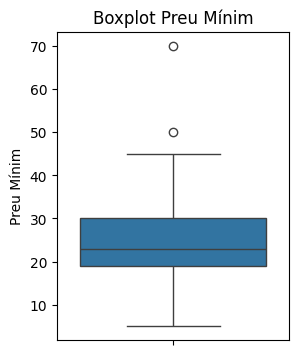

In [51]:
# Boxplot Outliers
plt.figure(figsize=(3, 4))
sns.boxplot(y=df["Preu Mínim"])
plt.title("Boxplot Preu Mínim")
plt.ylabel("Preu Mínim")
plt.show()

In [52]:
# Eliminar els outilers que veiem en el boxplot
Q1 = df["Preu Mínim"].quantile(0.25)
Q3 = df["Preu Mínim"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df["Preu Mínim"] >= lower) & (df["Preu Mínim"] <= upper)]

<div style="background-color: #e6f2ff; border-radius: 8px; padding: 18px; margin-bottom: 16px;">
    <strong>4. Anàlisi de les dades.</strong><br>
    4.1 Aplica un model supervisat i un no supervisat a les dades i comenta els resultats obtinguts.<br>
    4.2 Aplica una prova per contrast d'hipòtesi. Tingues en compte que algunes d'aquestes proves requereixen verificar prèviament la normalitat i homocedasticitat de les dades.
</div>


Com a model supervisat, hem escollit un arbre de decisió per intentar predir la nostra variable dependent, que és el preu mínim de l’entrada. Per fer-ho, hem dividit les dades en subconjunts d’entrenament i de test. Per escollir els millors hiperparàmetres, hem fet servir la funció GridSearchCV de la llibreria sklearn, que ens permet provar diversos valors d’hiperparàmetres i ens ajuda a seleccionar els més adequats.

En aquest cas, el resultat òptim ha estat una profunditat màxima de l’arbre de 6 nivells i un mínim de 14 instàncies per fulla. Obtenim un valor R2 molt baix, d’aproximadament 0.35, cosa que indica que som capaços de capturar només una petita part de la variància del model. El resultat és encara pitjor quan ho provem amb les dades del conjunt de test: obtenim un valor molt proper a 0 i fins i tot negatiu en algunes execucions, cosa que vol dir que el model no és capaç de predir correctament les dades.

In [53]:
X = df.drop(columns=["Preu Mínim"])
y = df["Preu Mínim"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# 4.1 Model supervisat - Arbre de Decisió (calculant valor òptim amb GridSearchCV)
param_grid = {
    "max_depth": range(1, 20),
    "min_samples_split": range(2, 20),
}
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, scoring="r2", cv=5)
grid.fit(X_train, y_train)
print(f"Millors hiperparàmetres: {grid.best_params_}, r2: {grid.best_score_}")

Millors hiperparàmetres: {'max_depth': 8, 'min_samples_split': 7}, r2: 0.3625681904257787


In [55]:
# Validar el model amb el conjunt de test
model = DecisionTreeRegressor(**grid.best_params_)
model.fit(X_train, y_train)
r2 = r2_score(y_test, model.predict(X_test))
print(f"R2 sobre el conjunt de test: {r2:.3f}")

R2 sobre el conjunt de test: -0.125


Com a model no supervisat, fem clustering mitjançant el mètode k-means. Escollim el valor òptim de k analitzant la suma dels residus quadrats (elbow method). El valor òptim trobat és k = 3, ja que les diferències entre passar d’1 a 2 clústers i de 2 a 3 són més significatives que les següents disminucions.

Les característiques dels tres clústers resultants són les següents:

<strong>Clúster 0</strong> (31 instàncies):
Esdeveniments principalment de nit amb una programació força variada, tot i que destaquen etiquetes com sinfónica, grandes figuras, música universal i piano, ja que la majoria d’instàncies que contenen aquestes etiquetes han estat classificades en aquest clúster.

<strong>Clúster 1</strong> (86 instàncies):
Esdeveniments exclusivament de nit, amb una gran varietat d’etiquetes que han estat classificades al 100% dins d’aquest grup. Destaquen, per exemple: flamenco, patrimoni català, jóvenes talentos, cine, cámara, entre d’altres.

<strong>Clúster 2</strong> (12 instàncies):
Inclou la majoria d’esdeveniments de tarda i tots els de matí. No destaca per cap categoria o etiqueta específica, però sí per tenir una mitjana de preus substancialment més baixa que la dels altres dos clústers.


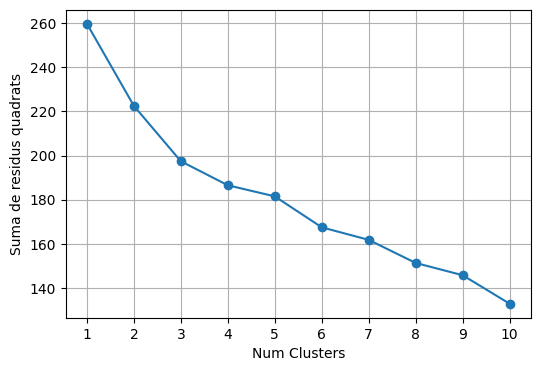

In [56]:
# 4.2 Model no supervisat - K-means clustering
rss = []
k_range = range(1, 11)
for k in k_range:
    kmeans_tmp = KMeans(n_clusters=k, random_state=42)
    kmeans_tmp.fit(X)
    rss.append(kmeans_tmp.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_range, rss, marker='o')
plt.xlabel('Num Clusters')
plt.ylabel('Suma de residus quadrats')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [57]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)
df["Cluster"] = clusters

In [58]:
# Número d'instancies per cluster
print("\nNúmero d'instancies per cluster:")
print(df["Cluster"].value_counts())


# Taula % d'etiquetes per cluster
bool_cols = df.select_dtypes(include="bool").columns
nombre_etiquetes_cluster = df.groupby("Cluster")[bool_cols].sum().T
total_instances_etiqueta = df[bool_cols].sum(axis=0)
taula_final = nombre_etiquetes_cluster.divide(total_instances_etiqueta, axis=0)
taula_final["Total"] = total_instances_etiqueta
print(taula_final)

# Imprimir el preu mitjà per cada cluster
print("\nPreu mitjà  cluster:")
print(df.groupby("Cluster")["Preu Mínim"].mean())


Número d'instancies per cluster:
Cluster
1    92
0    25
2    12
Name: count, dtype: int64
Cluster                      0         1         2  Total
coral                 0.166667  0.500000  0.333333     18
conciertosaccesibles  0.111111  0.777778  0.111111      9
nuevosformatos        0.000000  0.692308  0.307692     13
patrimoniocatalán     0.000000  1.000000  0.000000      4
popular               0.000000  1.000000  0.000000      6
enfamilia             0.000000  0.363636  0.636364     11
ópera                 0.000000  0.894737  0.105263     19
jazz                  0.000000  1.000000  0.000000      2
piano                 0.583333  0.416667  0.000000     12
estrenos              0.000000  0.666667  0.333333      3
jóvenestalentos       0.000000  1.000000  0.000000      4
antigua               0.000000  0.846154  0.153846     13
gradajoven            0.642857  0.214286  0.142857     14
sinfónica             0.741935  0.193548  0.064516     31
contemporánea         0.000000  0.7500

En aquest apartat també hem aplicat un contrast d'hipòtesi amb l'objectiu de determinar si la diferència de preus entre dues categories amb més esdeveniments (grans figures i música universal) és estadísticament significativa.

Per poder aplicar el test estadístic t-student per comparar les mitjanes dels preus, primer hem hagut de verificar la normalitat i la igualtat de les variàncies.

Per comprovar que els dos conjunts segueixen una distribució normal, hem aplicat el test de Shapiro a cada mostra. En els dos casos, el p-valor obtingut ha estat superior a 0.05. Per tant, no podem rebutjar la hipòtesi nul·la, que en aquest test es la normalitat. Això ens permet assumir que les dades segueixen una distribució normal.

Per comprovar que les variàncies són iguals, també hem aplicat un test estadístic. El p-valor ha estat major a 0.05, en el cas d'aquest test la hipòtesi nul·la és que les variàncies són iguals i amb aquest p-valor no podem rebutjar-la.

A l'executar el test t-student per variàncies iguals, obtenim un p-valor inferior a 0.05, per tant, rebutgem la hipòtesi nul·la que era que les mitjanes son iguals, com a resultat, hi ha una mitjana que es significativament més gran que l'altra.

Finalment, hem volgut comprovar quina era i hem fet un test final on en aquest cas la hipòtesi alternativa és que la mitjana de la mostra de grandes figuras és més gran. En el test, tornem a obtenir un valor inferior a 0.05 i rebutgem la hipòtesi nul·la i, per tant, hem de concloure l'esmentat en la hipòtesi alternativa. Els esdeveniments de grandes figuras son més cars que els de música universal.

In [59]:
# 4.2 Contrast d'hipòtesis
print(df[bool_cols].sum())

coral                    18
conciertosaccesibles      9
nuevosformatos           13
patrimoniocatalán         4
popular                   6
enfamilia                11
ópera                    19
jazz                      2
piano                    12
estrenos                  3
jóvenestalentos           4
antigua                  13
gradajoven               14
sinfónica                31
contemporánea             8
lied                      6
modernismo                6
cine                      5
músicauniversal          28
aniversarios              3
moderna                  15
grandesfiguras           27
flamenco                  5
cámara                    8
Franja Horària_Matí       2
Franja Horària_Nit      115
Franja Horària_Tarda     12
dtype: int64


In [60]:
grandesfiguras = df.loc[df["grandesfiguras"], "Preu Mínim"].values
musicauniversal = df.loc[df["músicauniversal"], "Preu Mínim"].values

# Test de Shapiro (H0: Normalitat)
_, p_value = shapiro(musicauniversal)
print(f"P-valor Test de Shapiro musica universal: {p_value:.4f}")

_, p_value = shapiro(grandesfiguras)
print(f"P-valor Test de Shapiro grandes figuras: {p_value:.4f}")

P-valor Test de Shapiro musica universal: 0.1315
P-valor Test de Shapiro grandes figuras: 0.1236


In [61]:
# Comprovar si les dues mostres tenen variàncies iguals
_, p_value = levene(musicauniversal, grandesfiguras)
print(f"P-valor Test de Variànces Iguals: {p_value:.4f}")

P-valor Test de Variànces Iguals: 0.5875


In [62]:
# Test t de Student per comparar les mitjanes dels preus
# H0: Les mitjanes dels preus són iguals

_, p_value = ttest_ind(grandesfiguras, musicauniversal, equal_var=True)
print(f"P-valor: {p_value:.4f}")


P-valor: 0.0053


In [63]:
# H0: Les mitjanes son iguals
# H1: mitjana grandesfiguras > mitjana musicauniversal
_, p_value = ttest_ind(grandesfiguras, musicauniversal, equal_var=True, alternative='greater')
print(f"P-valor (grandesfiguras > musicauniversal): {p_value:.4f}")

P-valor (grandesfiguras > musicauniversal): 0.0027


In [64]:
df.to_csv("concerts_dataset_analitzat.csv", sep=";", index=False)

<div style="background-color: #e6f2ff; border-radius: 8px; padding: 18px; margin-bottom: 16px;">
    <strong>5. Representació dels resultats</strong> a partir de taules i gràfiques. Aquest apartat es pot respondre al llarg de la pràctica, sense la necessitat de concentrar totes les representacions en aquest apartat. <br>
S'ha de representar tant el contingut del dataset per a observar les proporcions i distribucions de les diferents variables una vegada aplicada l'etapa de neteja, com els resultats obtinguts després de l'etapa d'anàlisi.

</div>

(Respòs al llarg de la pràctica)

<div style="background-color: #e6f2ff; border-radius: 8px; padding: 18px; margin-bottom: 16px;">
<strong>6. Resolució del problema.</strong> A partir dels resultats obtinguts, quines són les conclusions? Els resultats permeten respondre al problema?
</div>

A partir dels resultats obtinguts, es pot concloure que el model supervisat no és eficaç per respondre el problema plantejat. En concret, aquest model s'ha fet servir per predir el preu de l'entrada a partir de la classificació de les etiquetes i l'horari d'un esdeveniment. Aquestes variables no han estat suficients per construir un model predictiu precís. 

Aquestes variables capturen la suficient variabilitat de les dades per un anàlisi predictiu. No vol dir que no es pugui fer, sinó que potser faria falta incorporar noves dades com podrien ser la notorietat de l'artista o altra informació que puguem trobar no estructurada en el repertori.

En canvi, els mètodes no supervisats i les proves estadístiques que hem aplicat ens han permès conèixer informació sobre el tipus de programació que es fa al Palau de la Música, un dels altres problemes que havíem plantejat. En el clustering hem pogut classificar, i per tant identificar les característiques, de 3 tipologies diferenciades d'esdeveniments que es fan. El test estadístic també ens ha ajudat de forma efectiva a entendre les relacions que hi ha entre els Preus de diferents etiquetes.

En conclusió, el conjunt de dades no és tan bo per practicar el anàlisi predictiu com ens pensàvem, però continua sent útil per poder practicar mètodes d'agrupament no supervisats i els tests estadístics.

<div style="background-color: #e6f2ff; border-radius: 8px; padding: 18px; margin-bottom: 16px;">
    <strong>7. Codi.</strong> Cal adjuntar el codi, preferiblement en R, amb el que s’ha realitzat la neteja, anàlisi i representació de les dades. Si ho preferiu, també podeu treballar en Python.
</div>

https://github.com/jaumebuoc/PRACT2-tcvd.git

<div style="background-color: #e6f2ff; border-radius: 8px; padding: 18px; margin-bottom: 16px;">
<strong>8. Vídeo.</strong> Realitzar un breu vídeo explicatiu de la pràctica (màxim 10 minuts) on tots els integrants de l'equip expliquin amb les seves pròpies paraules el desenvolupament de la pràctica, basant-se en les preguntes de l'enunciat per a justificar i explicar el codi desenvolupat. Aquest vídeo s'haurà de lliurar a través d'un enllaç al Google Drive de la UOC (https://drive.google.com/…), juntament amb l’enllaç al repositori Git lliurat.
</div>


https://drive.google.com/file/d/1nQvoTNxxljGrGWCCcMNlQYK4MoNIJsXV/view?usp=sharing